check why mine is notworking

#### IMPORTS OF LIBRARY


In [29]:
import pandas as pd
import re
from sklearn.model_selection import cross_val_score, cross_val_predict,GridSearchCV
import nltk
import matplotlib.pyplot as plt
import numpy as np
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords




In [2]:
stemmer = PorterStemmer()
words = stopwords.words("english")


## CREATING A DATAFRAME FOR HAM AND SPAM


In [3]:
data = pd.read_csv('spam.csv')
data.drop(columns=['Unnamed: 2',"Unnamed: 3", "Unnamed: 4"],axis=1, inplace=True)


In [4]:
labels = data['v1']
data = data['v2']

In [5]:
x_train, x_test, y_train, y_test = train_test_split(data, labels , test_size=0.2, random_state=42,)

PIPELINE FOR PREPROCESSION

In [6]:
x_train

1978    No I'm in the same boat. Still here at my moms...
3989    (Bank of Granite issues Strong-Buy) EXPLOSIVE ...
3935       They r giving a second chance to rahul dengra.
4078       O i played smash bros  &lt;#&gt;  religiously.
4086    PRIVATE! Your 2003 Account Statement for 07973...
                              ...                        
3772    I came hostel. I m going to sleep. Plz call me...
5191                               Sorry, I'll call later
5226        Prabha..i'm soryda..realy..frm heart i'm sory
5390                           Nt joking seriously i told
860                   In work now. Going have in few min.
Name: v2, Length: 4457, dtype: object

In [7]:
string = ["life is you", 'the onely one']
for i in string :
    
    print(i)

life is you
the onely one


In [8]:
url_pattern = url_pattern = r'https?://\S+|www\.\S+'
email_pattern = r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Za-z]{2,7}\b'

In [9]:
(y_train=='ham').sum()

3860

In [10]:
(y_train=='spam').sum()

597

In [35]:
y_train.replace("spam",1, inplace=True)
y_train.replace("ham", 0, inplace=True)
y_test.replace("spam",1, inplace=True)
y_test.replace("ham", 0, inplace=True)


In [12]:
y_train

1978    0
3989    1
3935    0
4078    0
4086    1
       ..
3772    0
5191    0
5226    0
5390    0
860     0
Name: v1, Length: 4457, dtype: int64

In [13]:
class processing_text(BaseEstimator, TransformerMixin):
    def __init__(self,remove_punctuation= True, strip_email=True, to_lowercase= True, replace_url= True, replace_number= True, stemming= True):
        self.remove_punctuation = remove_punctuation
        self.strip_email = strip_email
        self.to_lowercase = to_lowercase
        self.replace_number = replace_number
        self.replace_url = replace_url
        self.stemming = stemming
        self.stemmed_data = []
        self.punctuations = ['!', '.', ',','?', ]
    def fit(self , x, y= None,):
        return self
    def transform(self, x, y=None):
        self.stemmed_data = []
        for text in x:
            tokenize_x = word_tokenize(text)
            url_pattern = url_pattern = r'https?://\S+|www\.\S+'
            email_pattern = r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Za-z]{2,7}\b'
            stemmed_sentence = []
            for word in tokenize_x:
                if self.remove_punctuation and word in self.punctuations:
                        continue
                if word in words:
                     continue
                if self.replace_url and re.match(url_pattern,word):
                    word = "URL"
                         
                if self.replace_number and re.match(r'\+?[0-9][0-9\-]+', word):
                     word = "NUMBER"
                     
                if self.strip_email and re.match(email_pattern,word):
                     continue    
                if self.to_lowercase:
                     word = word.lower()

                if self.stemming:
                    stemmed_word = stemmer.stem(word)
                    stemmed_sentence.append(stemmed_word)
                else:
                     stemmed_sentence.append(word)


            stemmed_text = ' '.join(stemmed_sentence)
            self.stemmed_data.append(stemmed_text)

        
        
        return self.stemmed_data



In [14]:
# class bag_of_words(BaseEstimator, TransformerMixin):
#     def __init__(self, top_words = 20):

#         self.vocab = []
#         self.max_vocab = top_words
#         self.bag_of_words = []
#         self.top_words = top_words

#     def fit(self,X,y= None):
#         for text in X:
#             for word in text:
#                 self.vocab.append(word)
#         unique_words = pd.Series(self.vocab).value_counts()
#         frequent_words = unique_words.index[:self.top_words]
#         self.vocab = set(frequent_words)
#         return self
#     def transform(self,X,y=None):
#         for text in X:
#             bag = np.zeros(self.top_words,dtype=np.float32)
#             for ind, word in enumerate(self.vocab):
#                 if word in text:
#                     bag[ind] = 1.0
#             self.bag_of_words.append(bag)
#         return self.bag_of_words       


In [15]:
class bag_of_words(BaseEstimator, TransformerMixin):
    def __init__(self, top_words= 20):
        self.top_words = top_words
        self.vectorizer = CountVectorizer(max_features = self.top_words, binary=True, lowercase=False, stop_words= "english")
    def fit(self,X,y= None):
        self.vectorizer.fit(X)
        return self
    def transform(self,X,y=None):
        bag_of_words = self.vectorizer.transform(X).toarray()
        return bag_of_words


In [16]:
pipeline = Pipeline([
 ('custom',processing_text()),
 ('bow',bag_of_words())
]
)

In [17]:
pipe_data = pipeline.fit_transform(x_train)

Since that is the default, I do not need any more change

## MODEL SELECTIONS

In [18]:
from sklearn.linear_model import  SGDClassifier
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, f1_score, precision_score, confusion_matrix, precision_recall_curve


In [19]:
models = [('sdg', SGDClassifier(random_state=42)), ('svc', SVC()),  ('naive', GaussianNB()), ('rfc', RandomForestClassifier())]
for model in models:
    score = cross_val_score(model[1], pipe_data, y_train, scoring= 'accuracy', cv=3)
    print(f"{model[0]} : {score}")

sdg : [0.96635262 0.95962315 0.95824916]


svc : [0.96366083 0.9602961  0.96026936]
naive : [0.42799462 0.42799462 0.38989899]
rfc : [0.96635262 0.96096904 0.96026936]


In [20]:
rfc = RandomForestClassifier(random_state=42)
model = rfc.fit(pipe_data,y_train)

In [21]:
predictions = cross_val_predict(rfc, pipe_data , y_train, cv=3)

In [22]:
confusion_matrix(y_train, predictions)

array([[3784,   76],
       [  91,  506]], dtype=int64)

3784 emails were correctly identified as non ha(True Negatives), 76 nwere wrongly identified as ham(falsse positive)
91 were incorrectly identified as spam(False negative), and 506 were rightly identified as spam(True positive).
For me , it is better for a spam to be identified as ham than ham identified by spam meaning i would prefer accuracy to recall

precision has to do with the percentage of the predictedd spam was correct , while recall has to do with the percentage of the total amount of spam it eas able to recognize

In [23]:
precision_score(y_train,predictions)

0.8694158075601375

In [24]:
recall_score(y_train, predictions)

0.847571189279732

In [25]:
f1_score(y_train, predictions)

0.8583545377438507

wowwwww, I think that is nice, but i feel ther sshould be a better one. We have way less the number of ositive class, so we woould be using the pr curve. The roc curve plots the true postive rate to the false positive rate

In [26]:
scores = cross_val_predict(rfc, pipe_data , y_train, cv=3, method='predict_proba')
y_score = scores[:,1]

In [27]:
precision, recall , thresholds = precision_recall_curve(y_train, y_score )

(0.0, 1.0)

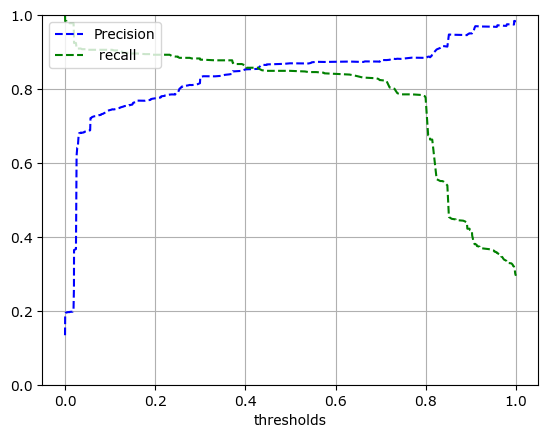

In [28]:
plt.plot(thresholds, precision[:-1], 'b--', label = 'Precision')
plt.plot(thresholds, recall[:-1], 'g--', label =' recall')
plt.xlabel('thresholds')
plt.grid()
plt.legend(loc = 'upper left')
plt.ylim([0,1])


TEST PREDICTIONS

In [30]:
transformed_test = pipeline.transform(x_test)

In [31]:
test_predictions = rfc.predict(transformed_test)

In [33]:
test_predictions

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [38]:
correct_predictions = (y_test == test_predictions).sum()/ len(y_test)
correct_predictions

0.9659192825112107

In [36]:
confusion_matrix(y_test,test_predictions)

array([[937,  28],
       [ 10, 140]], dtype=int64)

## This looks quite good,